In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

## Data

In [2]:
X, y = load_iris(return_X_y=True)

X = StandardScaler().fit_transform(X)

###  `sklearn.svm.l1_min_c`

`sklearn.svm.l1_min_c(X, y, *, loss='squared_hinge', fit_intercept=True, intercept_scaling=1.0)`

loss = {‘squared_hinge’, ‘log’}, default=’squared_hinge’
* Specifies the loss function. With ‘squared_hinge’ it is the squared hinge loss (a.k.a. L2 loss).
* With ‘log’ it is the loss of logistic regression models.

Return the lowest bound for C such that for C in (l1_min_C, infinity) the model is guaranteed not to be empty.

This applies to l1 penalized classifiers, such as 
* LinearSVC with penalty=’l1’
* linear_model.LogisticRegression with penalty=’l1’.

This value is valid if class_weight parameter in fit() is not set.

In [27]:
from sklearn.svm import l1_min_c

# minimum value for C
lower_bound = l1_min_c(X, y, loss='log')

print('minimum value for C',lower_bound)

minimum value for C 0.015325819388286623


In [36]:
C = np.linspace(lower_bound,7,20)

coef_list = []

for c in C:
    lr = LogisticRegression(C=c ,penalty='l1', solver='saga', multi_class='multinomial', tol=0.01).fit(X, y)
    coef_list.append(lr.coef_)
 
coef_list = np.array(coef_list)
print('Shape of Coef [#c , n_classes, n_features] :', coef_list.shape)

Shape of Coef [#c , n_classes, n_features] : (20, 3, 4)


In [52]:
# lets check the C
C

array([0.01532582, 0.38294025, 0.75055468, 1.11816911, 1.48578354,
       1.85339797, 2.2210124 , 2.58862683, 2.95624126, 3.32385569,
       3.69147012, 4.05908456, 4.42669899, 4.79431342, 5.16192785,
       5.52954228, 5.89715671, 6.26477114, 6.63238557, 7.        ])

In [51]:
data = load_iris()
print('Target names',data.target_names)
print('Feature names',data.feature_names)

Target names ['setosa' 'versicolor' 'virginica']
Feature names ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


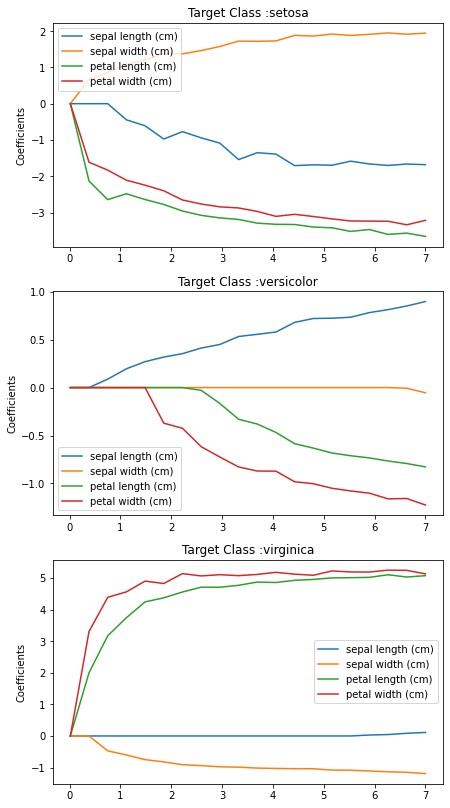

In [77]:
plt.figure(figsize=(7,14))

for i in range(3):
    plt.subplot(3,1,i+1)
    plt.plot(C, coef_list[:,i,:], label=data.feature_names)
    plt.legend()
    plt.title(f'Target Class :{data.target_names[i]}')
    plt.ylabel('Coefficients')

